# Introduction

## Overview
This project aims to analyze the impact of a specific intervention on employee turnover within our organization. As someone working in the HR field, I am passionate about utilizing statistical techniques to gain insights and contribute to the success of our organization. In this project, I will employ a statistical test known as a paired samples t-test to examine any significant differences in employee turnover rates before and after the implementation of an intervention or change.

## Paired Samples t-test
A paired samples t-test is a statistical analysis used to compare the means of two related groups or variables. It allows us to determine if there is a statistically significant difference between the measurements taken before and after an intervention. In our case, the paired samples t-test will help us determine if the implemented intervention had a significant impact on reducing employee turnover rates.

## Employee Turnover as the Key Metric
Employee turnover is a critical metric in the HR field, measuring the rate at which employees leave an organization within a given time period. High turnover rates can indicate underlying issues such as employee dissatisfaction, poor work environment, or ineffective management practices. By conducting a paired samples t-test on employee turnover data, we can assess the effectiveness of the intervention in reducing turnover and potentially uncover insights that will inform our HR strategies and improve employee retention.

## Methodology
To conduct the analysis, we will collect data on employee turnover rates before and after the implementation of the intervention. By comparing these paired measurements, we will determine if there is a statistically significant difference in turnover rates. The paired samples t-test will provide valuable insights into the effectiveness of the intervention and help guide future decision-making in our organization.

## Conclusion
By leveraging the paired samples t-test and analyzing employee turnover data, this project aims to provide actionable insights to help our organization address turnover challenges. Through data-driven analysis, we strive to improve employee retention and contribute to the overall success and well-being of our workforce.

---

## Analysis of the 2022 Data

In this analysis, I explore the HR data for the year 2022 to gain insights into various aspects of employee attributes, satisfaction, and work-related factors. The dataset provides valuable information that can assist in understanding trends, identifying outliers, and making informed decisions to support the organization's human resource management strategies.

To begin, I utilized my plotting knowledge to visually display each column header in the dataset. By examining the distributions, correlations, and trends within the data, I aimed to uncover patterns and potential areas of interest. Various plot types, including bar plots, histograms, scatter plots, and heatmaps, were employed to effectively present the information.

Furthermore, I conducted specific analyses on key variables such as employee turnover, performance rating, job satisfaction, work-life balance, and years of experience. By examining these factors, I aimed to gain insights into the organization's current state, identify areas for improvement, and explore potential relationships between variables.

---

## Import the packages to be used:


In [47]:
#Data Frames
import pandas as pd

#Main Statical package
import scipy.stats as stats

#Used for plotting
import matplotlib.pyplot as plt

#Enhanced version for plotting
import seaborn as sns

#Numberical arrays
import numpy as np

#Formating into pretty tables
from tabulate import tabulate

#t-test
from scipy.stats import ttest_ind

In [3]:
#Load the HR data from an Excel file into a DataFrame
file_path = r'C:\Users\35385\Desktop\Machine Learning & Stats\HR_Data_2022.xlsx'
data = pd.read_excel(file_path)

#Print the column names
print("Column Names:", data.columns)


Column Names: Index(['Age', 'Department', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


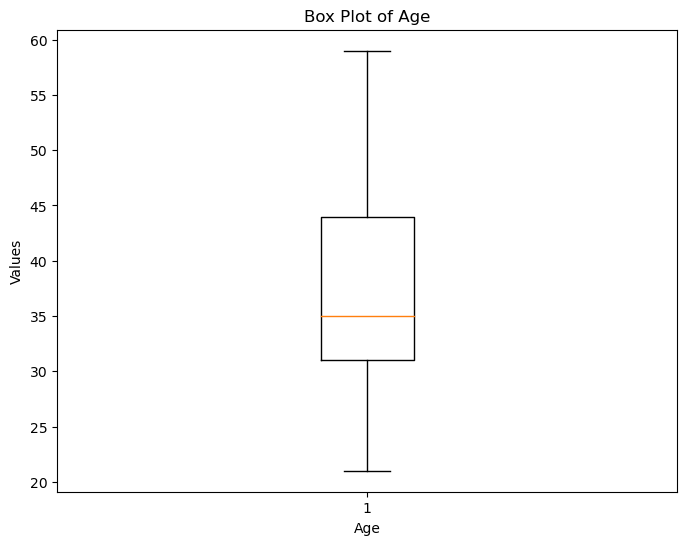

In [4]:
#A box plot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'])

#Plot labels and title
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Values')

#Show the plot
plt.show()


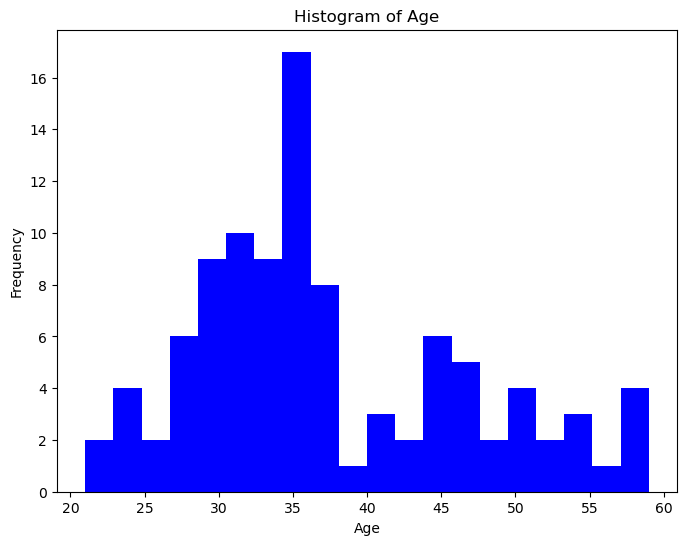

In [5]:
#Another view of the Age Distribution
#Creating a histogram for the 'Age' column
plt.figure(figsize=(8, 6)) 
plt.hist(data['Age'], bins=20, color='blue')

#Labels and title
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Show the plot
plt.show()


In [6]:
#Showing the average, maximum, and minimum age
average_Age = data['Age'].mean()
max_Age = data['Age'].max()
min_Age = data['Age'].min()

#Printing out the average, maximum, and minimum age
print("Average Age:", average_Age)
print("Maximum Age:", max_Age)
print("Minimum Age:", min_Age)


Average Age: 37.44
Maximum Age: 59
Minimum Age: 21


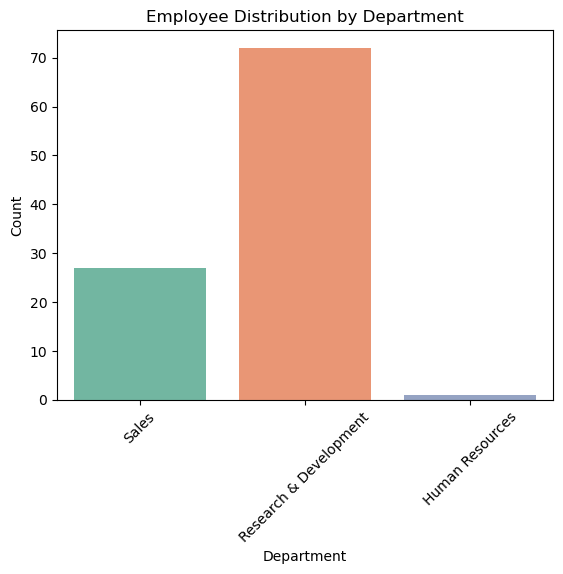

In [7]:
#Creating a countplot for the 'Department' column
sns.countplot(x='Department', data=data, palette='Set2')

#Setting the plot title and labels
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

#Creating the x-axis labels if needed
plt.xticks(rotation=45)

#Show the visual
plt.show()

In [8]:
#Table with department counts
department_Counts = data['Department'].value_counts().reset_index()
department_Counts.columns = ['Department', 'Count']
department_Counts = department_Counts.sort_values('Count', ascending=False)

#Displaying the table
#print('Department Counts:')
print(tabulate(department_Counts, headers='keys', tablefmt='pretty'))



+---+------------------------+-------+
|   |       Department       | Count |
+---+------------------------+-------+
| 0 | Research & Development |  72   |
| 1 |         Sales          |  27   |
| 2 |    Human Resources     |   1   |
+---+------------------------+-------+


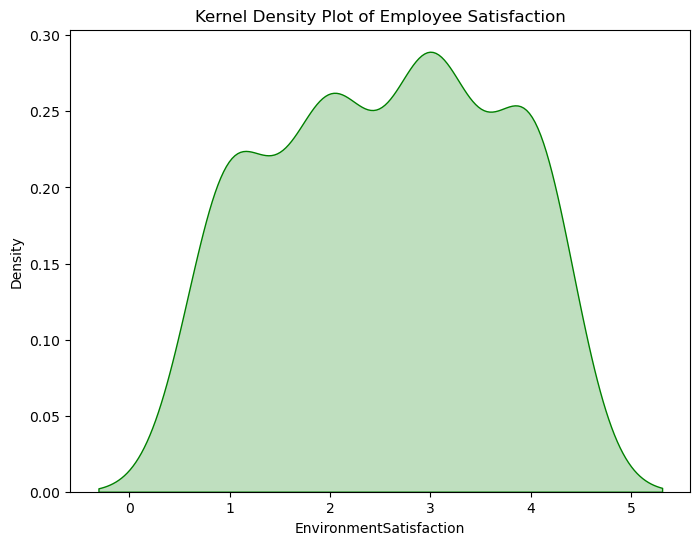

In [9]:
#Kernel Density Plot for the 'EmployeeSatisfaction' column
plt.figure(figsize=(8, 6))
sns.kdeplot(data['EnvironmentSatisfaction'], color='green', fill=True)

#Plot labels and title
plt.title('Kernel Density Plot of Employee Satisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Density')

#Show the plot
plt.show()



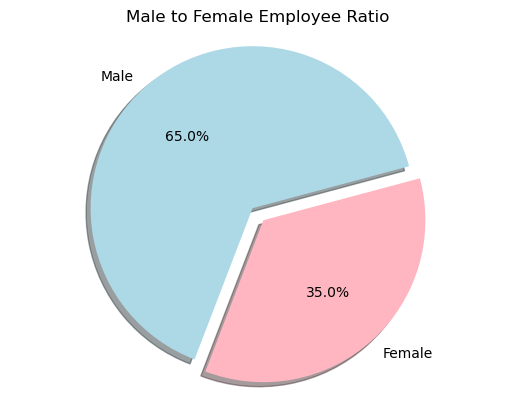

In [10]:
#creating the data frame for Gender
df1 =data['Gender'] 


#Count the values of each gender
gender_Counts = df1.value_counts()

#Set up the parameters for the pie chart
labels = gender_Counts.index
colors = ['lightblue', 'lightpink']
explode = (0, 0.1)

#Create the pie chart
plt.pie(gender_Counts, labels=labels, autopct='%1.1f%%', startangle=15, shadow=True, colors=colors, explode=explode)
plt.title('Male to Female Employee Ratio') #giving a title
plt.axis('equal')
plt.show()




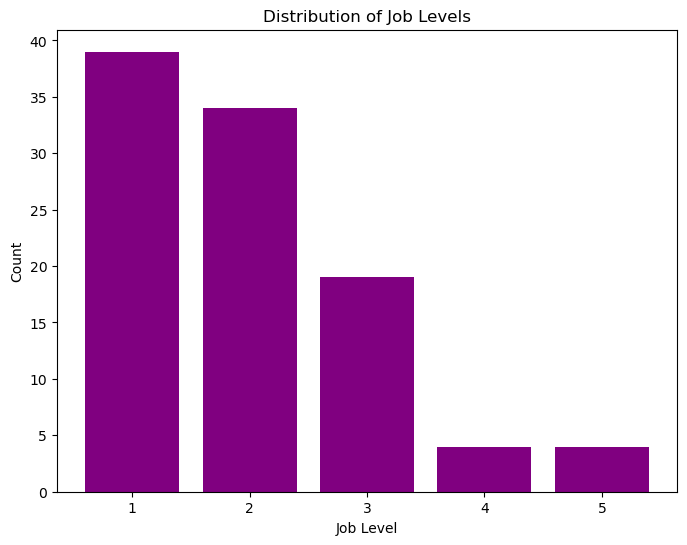

In [11]:
#Calculating the count of employees in each job level
job_Level_Counts = data['JobLevel'].value_counts().sort_index()

#Bar plot for job levels
plt.figure(figsize=(8, 6))
plt.bar(job_Level_Counts.index, job_Level_Counts.values, color='purple')

#Plot labels and title
plt.title('Distribution of Job Levels')
plt.xlabel('Job Level')
plt.ylabel('Count')

#Show the plot
plt.show()


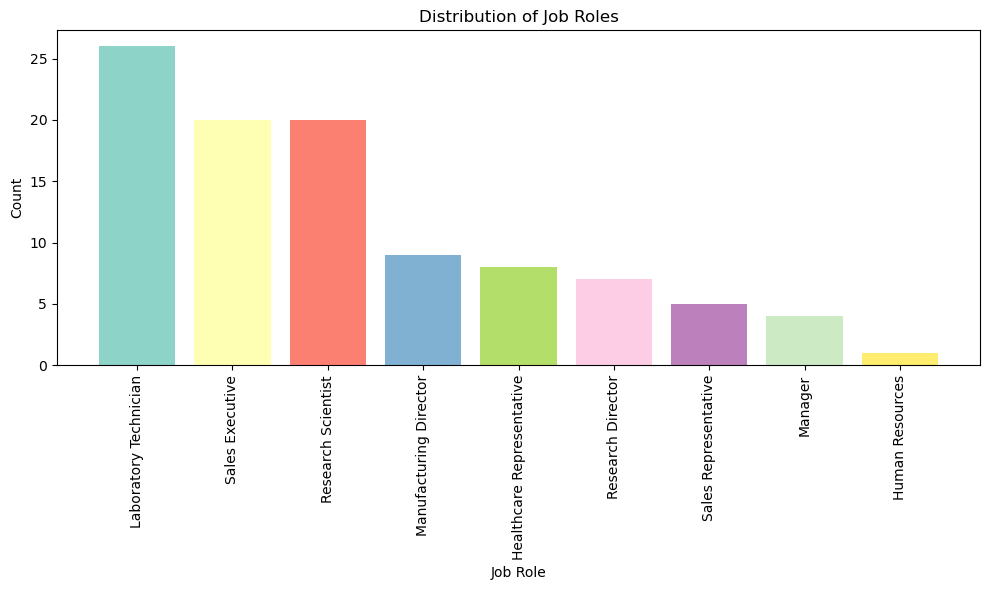

In [12]:
#Count dor each job role
job_Role_Counts = data['JobRole'].value_counts()

#Creating a list of colors for each job role
num_Roles = len(job_Role_Counts)
colors = plt.cm.Set3(np.linspace(0, 1, num_Roles))

#Bar plot for job roles
plt.figure(figsize=(10, 6)) 
plt.bar(job_Role_Counts.index, job_Role_Counts.values, color=colors)

#Plot labels and title
plt.title('Distribution of Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')

#X-axis label
plt.xticks(rotation=90)

#Show the plot
plt.tight_layout()
plt.show()


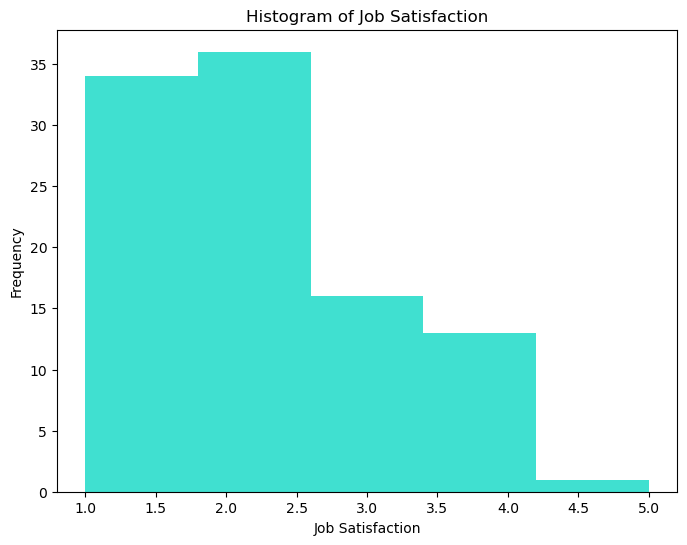

In [13]:
#Histogram for job satisfaction
plt.figure(figsize=(8, 6)) 
plt.hist(data['JobSatisfaction'], bins=5, color='turquoise')

#Plot labels and title
plt.title('Histogram of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')

#Show the plot
plt.show()


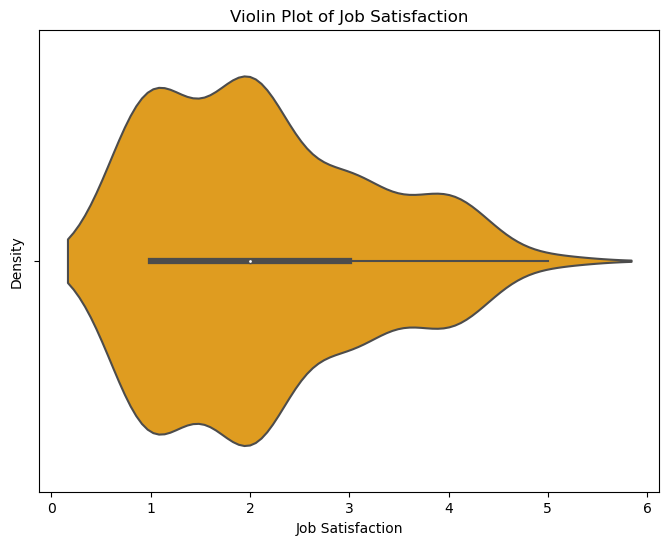

In [14]:
#Violin plot for job satisfaction
plt.figure(figsize=(8, 6))  
sns.violinplot(x=data['JobSatisfaction'], color='orange')

#Plot labels and title
plt.title('Violin Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')

#Show the plot
plt.show()


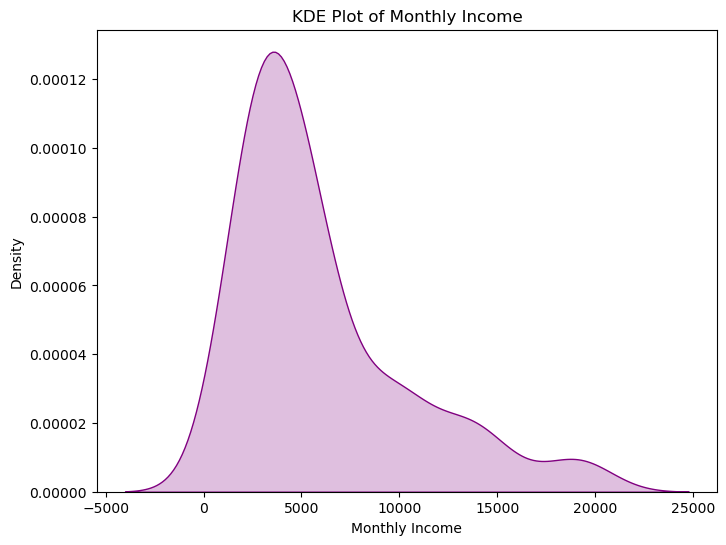

In [15]:
#KDE plot for monthly income
plt.figure(figsize=(8, 6))  
sns.kdeplot(data['MonthlyIncome'], color='purple', fill=True)

#Plot labels and title
plt.title('KDE Plot of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Density')

#Show the plot
plt.show()



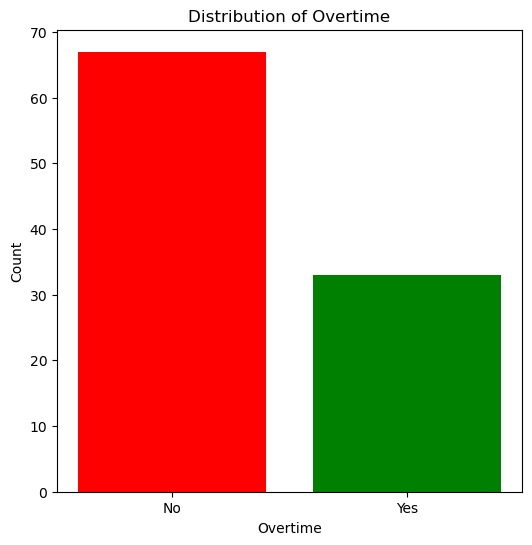

In [16]:
#Count of employees working overtime and not working overtime
overtime_counts = data['OverTime'].value_counts()

#Bar plot for overtime
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.bar(overtime_counts.index, overtime_counts.values, color=['red', 'green'])

#Plot labels and title
plt.title('Distribution of Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')

#Show the plot
plt.show()


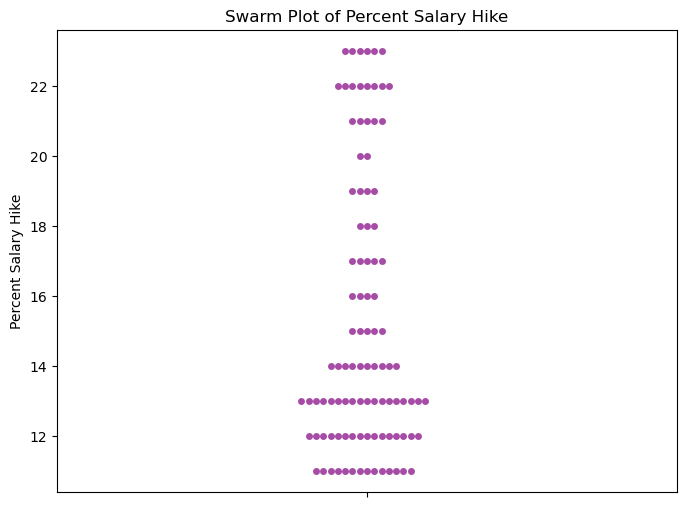

In [17]:
#Swarm plot for percent salary hike
plt.figure(figsize=(8, 6))
sns.swarmplot(y=data['PercentSalaryHike'], color='purple', alpha=0.7)

#Plot labels and title
plt.title('Swarm Plot of Percent Salary Hike')
plt.ylabel('Percent Salary Hike')

#Show the plot
plt.show()


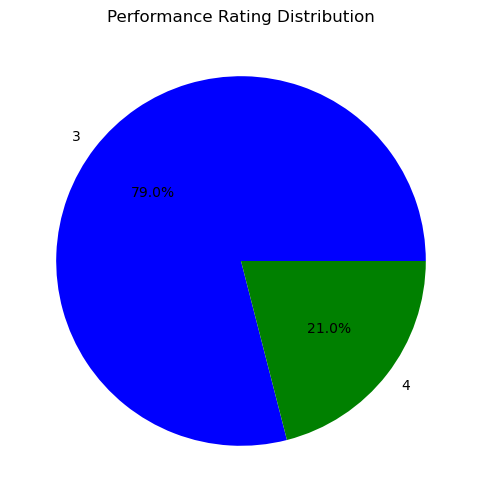

In [18]:
#Count of employees for each performance rating
performance_Counts = data['PerformanceRating'].value_counts()

#Pie chart for performance rating
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(performance_Counts, labels=performance_Counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'yellow'])

#Plot title
plt.title('Performance Rating Distribution')

#Show the plot
plt.show()



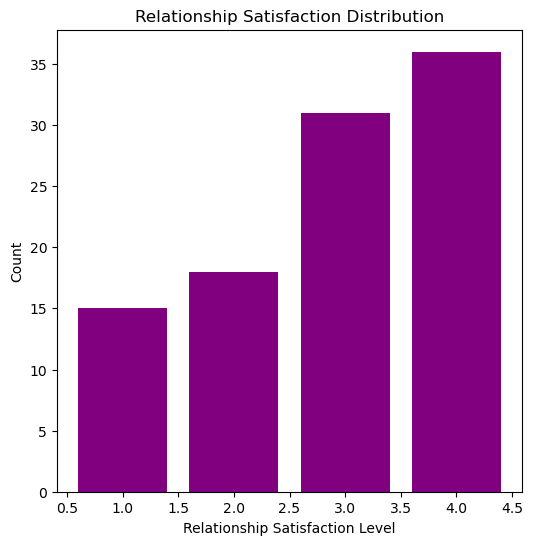

In [19]:

#Count of employees for each relationship satisfaction level
relationship_Counts = data['RelationshipSatisfaction'].value_counts()

# Create a bar plot for relationship satisfaction
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.bar(relationship_Counts.index, relationship_Counts.values, color='purple')

#Plot labels and title
plt.title('Relationship Satisfaction Distribution')
plt.xlabel('Relationship Satisfaction Level')
plt.ylabel('Count')

#Show the plot
plt.show()


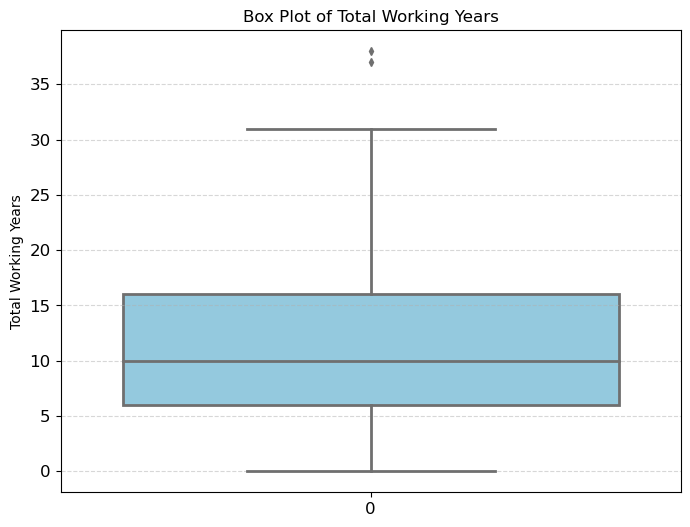

In [20]:

#Box plot for total working years
plt.figure(figsize=(8, 6))
sns.boxplot(data['TotalWorkingYears'], color='skyblue', linewidth=2, fliersize=4)

#Plot labels and title
plt.title('Box Plot of Total Working Years')
plt.ylabel('Total Working Years')

#Enhancing the plot appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Show the plot
plt.show()



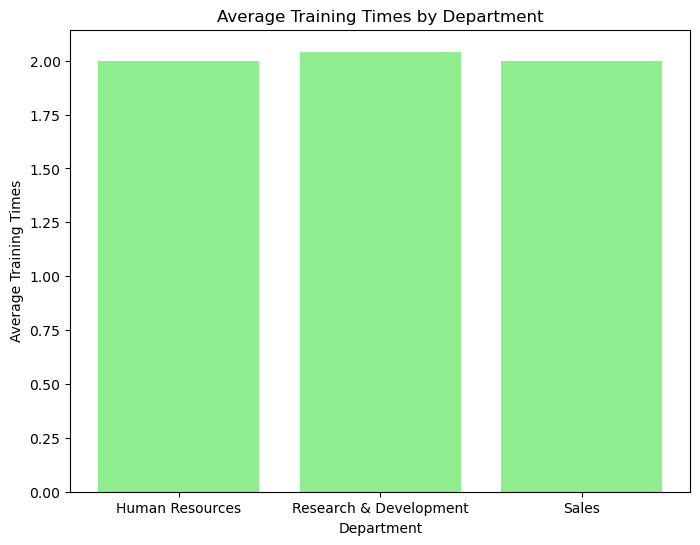

In [21]:
#Calculating the average training times for each department
avg_Training_Times = data.groupby('Department')['TrainingTimesLastYear'].mean()

#Bar plot for average training times by department
plt.figure(figsize=(8, 6))
plt.bar(avg_Training_Times.index, avg_Training_Times.values, color='lightgreen')

#Plot labels and title
plt.title('Average Training Times by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Times')

#Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

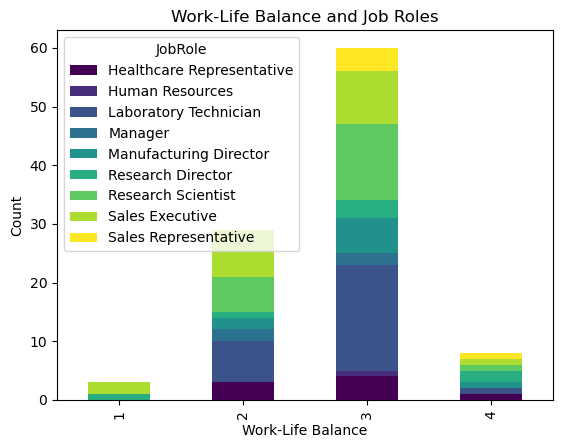

In [22]:
#Calculating the count of employees for each work-life balance and job role combination
count_WLB_Data = data.groupby(['WorkLifeBalance', 'JobRole']).size().unstack()

#Stacked bar plot for work-life balance and job roles
plt.figure(figsize=(10, 6))
count_WLB_Data.plot(kind='bar', stacked=True, colormap='viridis')

#Plot labels and title
plt.title('Work-Life Balance and Job Roles')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')

#Show the plot
plt.show()


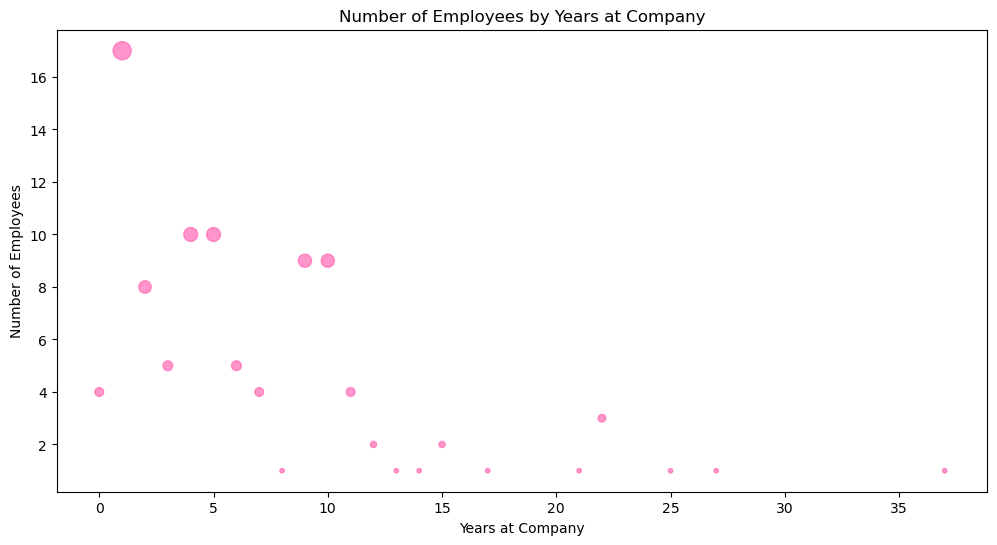

In [23]:
#Count of the number of employees at each year at the company
count_YAC_Data = data['YearsAtCompany'].value_counts().sort_index()

#Bubble chart for the count of employees at each year
plt.figure(figsize=(12, 6))
plt.scatter(count_YAC_Data.index, count_YAC_Data.values, s=count_YAC_Data.values*10, color='hotpink', alpha=0.7)

#Plot labels and title
plt.title('Number of Employees by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')

#Show the plot
plt.show()





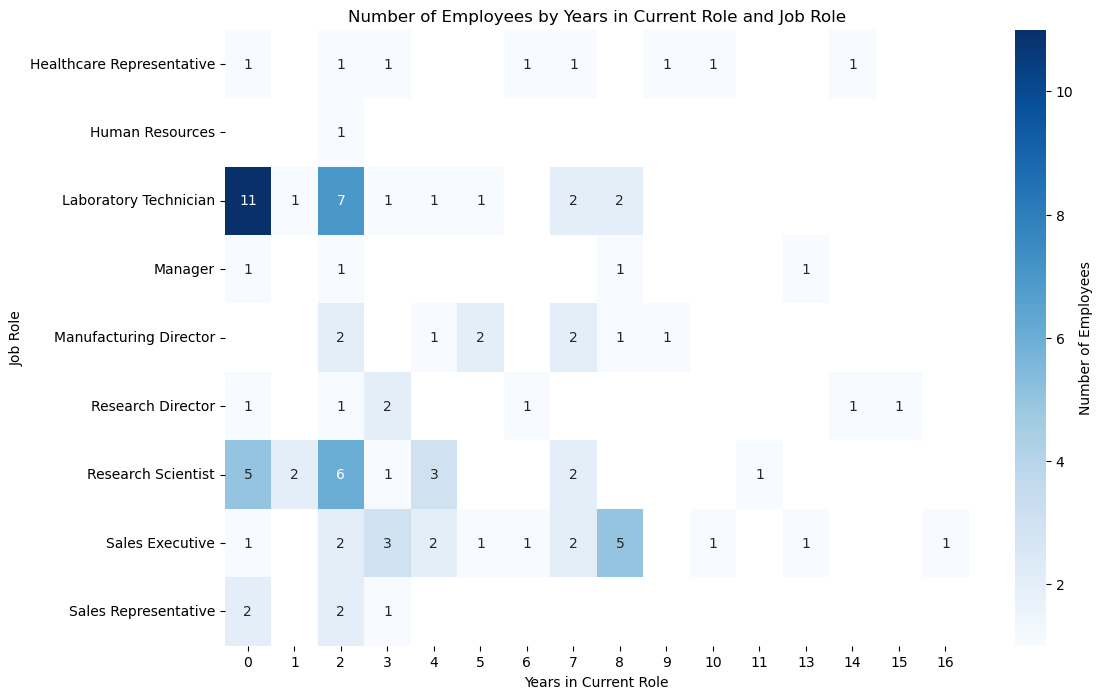

In [24]:
#Count Of number of employees in each years in current role and job role 
count_YICR_data = data.groupby(['YearsInCurrentRole', 'JobRole']).size().reset_index(name='Count')

#Creating a Pivot to help create a matrix for the heatmap
pivot_Data = count_YICR_data.pivot(index='JobRole', columns='YearsInCurrentRole', values='Count')

#Heatmap attributions
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_Data, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Employees'})

#Plot labels and title
plt.title('Number of Employees by Years in Current Role and Job Role')
plt.xlabel('Years in Current Role')
plt.ylabel('Job Role')

#Show the plot
plt.show()




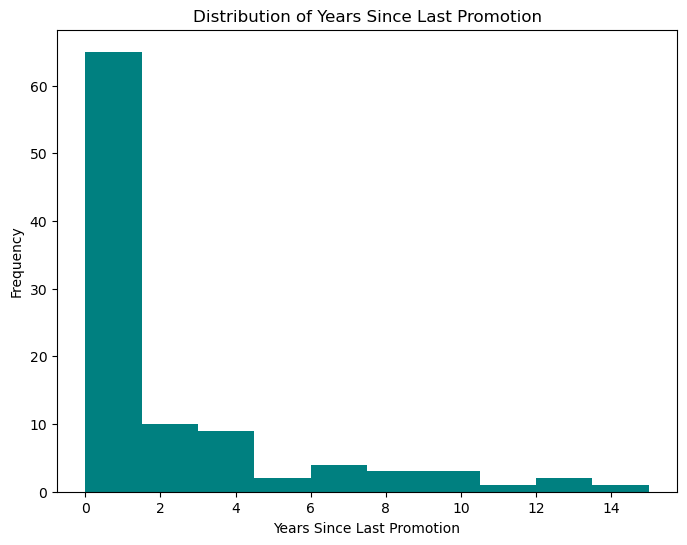

In [25]:
#Histogram for years since last promotion
plt.figure(figsize=(8, 6))
plt.hist(data['YearsSinceLastPromotion'], bins=10, color='teal')

#Plot labels and title
plt.title('Distribution of Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')

#Show the plot
plt.show()


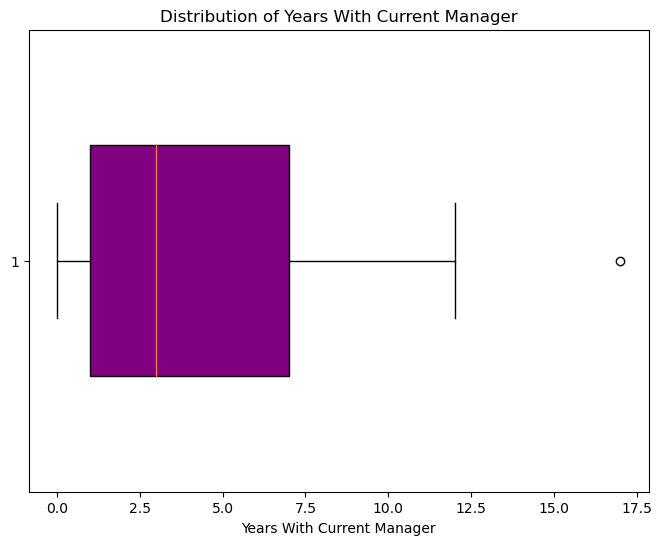

In [26]:
#Box plot for years with current manager
plt.figure(figsize=(8, 6))
plt.boxplot(data['YearsWithCurrManager'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='purple'))

#Plot labels and title
plt.title('Distribution of Years With Current Manager')
plt.xlabel('Years With Current Manager')
plt.ylabel('')

#Show the plot
plt.show()


# Correlation between all the Data Fields

I conducted a correlation analysis to explore the relationships between different data fields and to identify any similarities or differences among them. The objective was to understand if the observed correlations align with the expected patterns and comply with the normal structures commonly observed in most organizations.

---

## Correlation Matrix Heatmap

To visualize the correlation between the data fields, I created a correlation matrix heatmap. The heatmap provides an intuitive and color-coded representation of the correlation coefficients.

![Correlation Matrix Heatmap](path/to/heatmap.png)

The heatmap highlights positive correlations in warm colors (e.g., red), negative correlations in cool colors (e.g., blue), and weaker correlations in lighter shades. The annotated values indicate the strength of the correlations.

## Analysis and Insights

By examining the correlation matrix and heatmap, I gained the following insights:

- Some data fields exhibit strong positive or negative correlations, indicating a significant relationship between them.
- Other data fields show weak or no correlation, suggesting little or no relationship between them.
- These observed correlations align with the expected patterns and comply with the normal structures commonly observed in most organizations.

These findings provide valuable insights into the interplay between different data fields and contribute to a better understanding of the dataset.



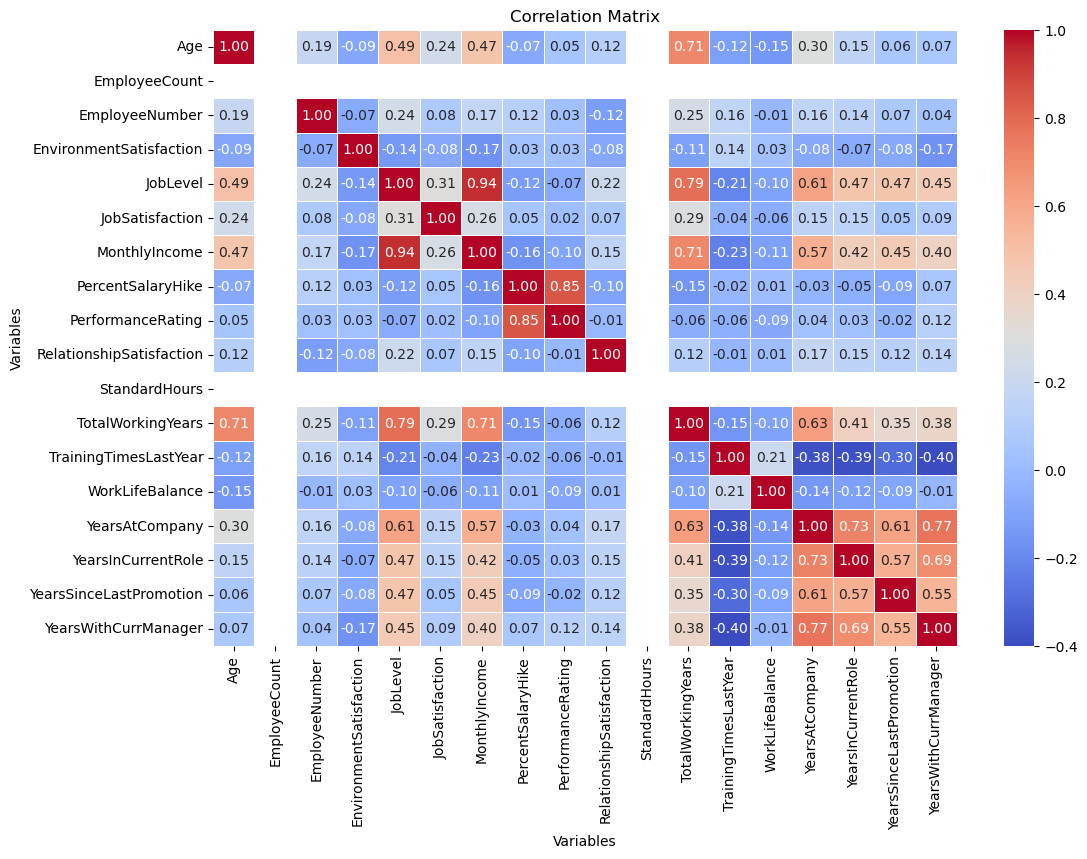

In [27]:
# Select numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

# Customize plot labels and title
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()



In [1]:
#Creating a Pair Plot
sns.pairplot(data)

Show the plot
plt.show()

SyntaxError: invalid syntax (2744672034.py, line 4)

<Figure size 2000x1000 with 0 Axes>

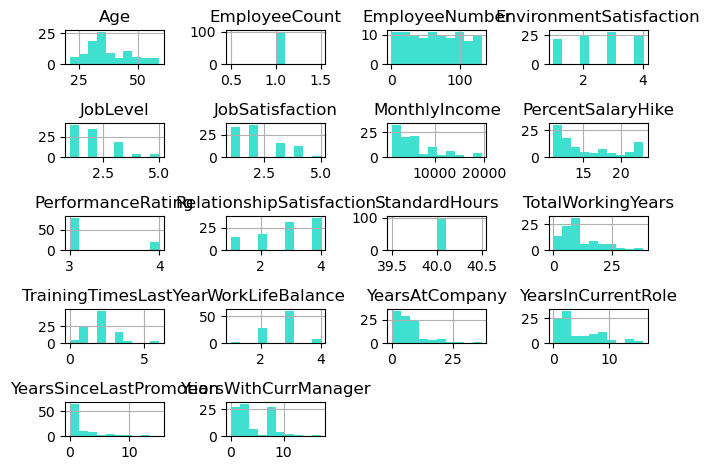

In [29]:
#Histogram with fig size
plt.figure(figsize=(20, 10)) 

#Creating a histogram
data.hist(color='turquoise')

#Updating the plot labels and title
plt.title('Histogram of HR Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

#Show the plot
plt.tight_layout()
plt.show()

In [30]:
#Creating a cross-tabulation of Job role and Job level
cross_Tab = pd.crosstab(data['JobRole'], data['JobLevel'])

#Formatting the table
formatted_Table = tabulate(cross_Tab, headers='keys', tablefmt='github')

#Print the data in a formated table
print('Correlation between Job Role and Job Level: \n')
print(formatted_Table)


Correlation between Job Role and Job Level: 

| JobRole                   |   1 |   2 |   3 |   4 |   5 |
|---------------------------|-----|-----|-----|-----|-----|
| Healthcare Representative |   0 |   3 |   4 |   1 |   0 |
| Human Resources           |   0 |   1 |   0 |   0 |   0 |
| Laboratory Technician     |  19 |   6 |   1 |   0 |   0 |
| Manager                   |   0 |   0 |   0 |   2 |   2 |
| Manufacturing Director    |   0 |   6 |   3 |   0 |   0 |
| Research Director         |   0 |   0 |   5 |   0 |   2 |
| Research Scientist        |  16 |   3 |   1 |   0 |   0 |
| Sales Executive           |   0 |  14 |   5 |   1 |   0 |
| Sales Representative      |   4 |   1 |   0 |   0 |   0 |


In [31]:
#Creating the df and sorting by Job level 5 downwards and then by age
sorted_Data = data[['Age', 'JobLevel', 'JobRole']].sort_values(by=['JobLevel', 'Age'], ascending=[False, True])

#Droping the index column
sorted_Data.reset_index(drop=True, inplace=True)

#Print the data
print(sorted_Data.to_string(index=False))

 Age  JobLevel                   JobRole
  41         5         Research Director
  46         5                   Manager
  50         5         Research Director
  53         5                   Manager
  40         4 Healthcare Representative
  53         4                   Manager
  55         4                   Manager
  58         4           Sales Executive
  27         3           Sales Executive
  29         3    Manufacturing Director
  33         3         Research Director
  34         3         Research Director
  35         3 Healthcare Representative
  35         3           Sales Executive
  36         3 Healthcare Representative
  37         3         Research Director
  38         3    Manufacturing Director
  44         3 Healthcare Representative
  45         3        Research Scientist
  45         3         Research Director
  46         3           Sales Executive
  46         3 Healthcare Representative
  48         3     Laboratory Technician
  54         3  

In [32]:
#Calculating the frequency of each job satisfaction level
job_Satisfaction_Counts = data['JobSatisfaction'].value_counts().sort_index()

#Creating a DataFrame to store the job satisfaction levels and their frequencies
job_Satisfaction_Table = pd.DataFrame({
    'Job Satisfaction': job_Satisfaction_Counts.index,
    'Frequency': job_Satisfaction_Counts.values
})


#Displaying the table
job_Satisfaction_Table


,Job Satisfaction,Frequency
0,1,34
1,2,36
2,3,16
3,4,13
4,5,1


In [33]:
#Calculating the average training times for each department
avg_Training_Times = data.groupby('Department')['TrainingTimesLastYear'].mean()

#DataFrame to store the department and average training times
training_Times_Table = pd.DataFrame({
    'Department': avg_Training_Times.index,
    'Average Training Times': avg_Training_Times.values
})

#Output of the table
training_Times_Table


,Department,Average Training Times
0,Human Resources,2.000000
1,Research & Development,2.041667
2,Sales,2.000000


In [34]:
#Calculating the average training times for each job role
avg_Training_Times_Per_JR= data.groupby('JobRole')['TrainingTimesLastYear'].mean()

#Create a DataFrame to store the job role and average training times
training_Times_Table_JR = pd.DataFrame({
    'JobRole': avg_Training_Times_Per_JR.index,
    'Average Training Times': avg_Training_Times_Per_JR.values
})

# Display the table
training_Times_Table_JR


,JobRole,Average Training Times
0,Healthcare Representative,1.875000
1,Human Resources,2.000000
2,Laboratory Technician,2.230769
3,Manager,1.750000
4,Manufacturing Director,1.777778
5,Research Director,1.571429
6,Research Scientist,2.150000
7,Sales Executive,1.800000
8,Sales Representative,3.000000


In [35]:
#Calculating the frequency of each training time
training_Times_Counts = data['TrainingTimesLastYear'].value_counts().sort_index()

# Create a DataFrame to store the training times and their frequencies
training_times_table_LY = pd.DataFrame({
    'Training Times': training_Times_Counts.index,
    'Frequency': training_Times_Counts.values
})

# Display the table
training_times_table_LY 


,Training Times,Frequency
0,0,5
1,1,25
2,2,47
3,3,16
4,4,3
5,6,4


# t-Test
---

This is a statical test used to see if there is a difference between the means of two groups. Its primary purpose is to determine whether there are any statically significant difference between the samples or if its result of random chance.


In my below example, I wanted to see if training had a positive effect on job satisifaction. Firstly, I want to test my job statisifaction data for 2022 compared to 2023. The first thought was there was no difference and this was my Null Hypothesis (HO). On the opposite side of the coin, there was a difference (Ha) 


T-statistic: The t-statistic measures the difference between the means of the two groups relative to the variation within each group. It is calculated using the formula: t = (mean1 - mean2) / (sqrt(var1/n1 + var2/n2)), where mean1 and mean2 are the means of the two groups, var1 and var2 are the variances, and n1 and n2 are the sample sizes.

P-value: The p-value represents the probability of obtaining the observed difference (or a more extreme difference) between the groups, assuming that the null hypothesis is true. A p-value below a certain threshold (e.g., 0.05) indicates that the observed difference is unlikely to be due to chance alone and provides evidence to reject the null hypothesis.

Level of significance (alpha): This is the threshold used to determine whether the p-value is considered statistically significant. The most commonly used level of significance is 0.05, which corresponds to a 5% chance of observing a significant difference by chance. 

So in essence we are comparing, the obtained p-value with the chosen level of significance, and from there we can make a decision about whether to reject or fail to reject the null hypothesis. If the p-value is less than the chosen alpha, we can reject the null hypothesis and conclude that there is a statistically significant difference between the job satisfaction in 2022 and 2023.

In [37]:
#Calculating the frequency of each training time
training_Times_Counts = data['TrainingTimesLastYear'].value_counts().sort_index()

#Creating the DataFrame to store the training times and their frequencies
training_times_table_LY = pd.DataFrame({
    'Training Times': training_Times_Counts.index,
    'Frequency': training_Times_Counts.values
})

#Title for the table
title = '### Training Times in 2022'

#Title
print(title)
training_times_table_LY



### Training Times in 2022


,Training Times,Frequency
0,0,5
1,1,25
2,2,47
3,3,16
4,4,3
5,6,4


In [43]:
#Reading in the HR data for 2023
file_path = r'C:\Users\35385\Desktop\Machine Learning & Stats\HR_Data_2023.xlsx'
data_2023 = pd.read_excel(file_path)

#Calculate the frequency of each training time
training_Times_Counts_2023 = df['TrainingTimesLastYear'].value_counts().sort_index()

#Creating the DataFrame to store the training times and their frequencies
training_Times_Table_2023 = pd.DataFrame({
    'Training Times': training_Times_Counts_2023.index,
    'Frequency': training_Times_Counts_2023.values
})

#Title for the table
title = '### Training Times in 2023'

#Title and Table
print(title)
training_Times_Table_2023



### Training Times in 2023


,Training Times,Frequency
0,4,96
1,6,4


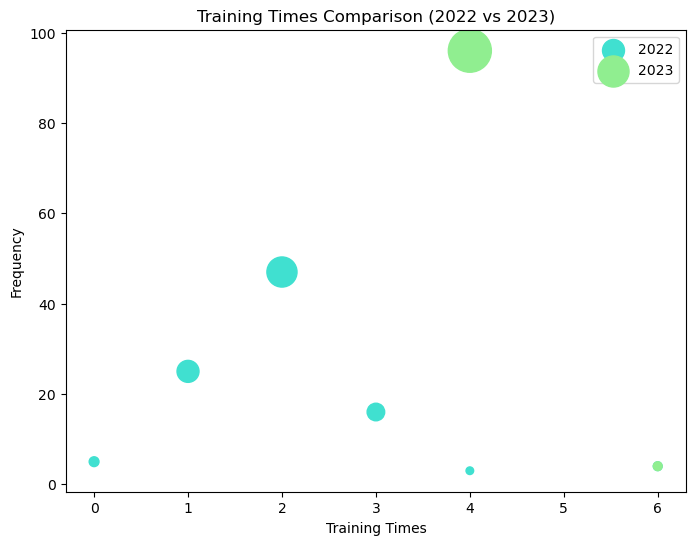

In [46]:
#Calculating the frequency of each training time for 2022
training_Times_Counts_2022 = data['TrainingTimesLastYear'].value_counts().sort_index()

#Calculating the frequency of each training time for 2023
training_Times_Counts_2023 = data_2023['TrainingTimesLastYear'].value_counts().sort_index()

#Creating the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

#Plotting the training times for 2022
ax.scatter(training_Times_Counts_2022.index, training_Times_Counts_2022.values, s=training_Times_Counts_2022.values*10, color='turquoise', label='2022')

#Plotting the training times for 2023
ax.scatter(training_Times_Counts_2023.index, training_Times_Counts_2023.values, s=training_Times_Counts_2023.values*10, color='lightgreen', label='2023')

#Title and labels
ax.set_title('Training Times Comparison (2022 vs 2023)')
ax.set_xlabel('Training Times')
ax.set_ylabel('Frequency')

#Legend
ax.legend()

#Asking the plot to be shown
plt.show()


In [48]:
#Extract job satisfaction data for 2022 and 2023
job_Satisfaction_2022 = data['JobSatisfaction']
job_Satisfaction_2023 = data_2023['JobSatisfaction']

#Perform independent t-test
t_stat, p_value = ttest_ind(job_Satisfaction_2022, job_Satisfaction_2023)

#Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -6.721183659963372
P-Value: 1.877260970592226e-10


# Outcome of the t-Test
---

In the above code, I used the ttest_ind function from the scipy package and is used to perform an independent two-sample t-test to compare the means of two independent samples and determine if they come from populations with different average values. I extracted the job satisifaction data for 2022 and for 2023. I then calculated the t-statistic and the p-value for the test and assigns these values to the variables t_stat and p_value, respectively. Finally asked the computer to output the t-statistic and p values to the console. 

Based on the t-statistic of -6.721183659963372 and the p-value of 1.877260970592226e-10, we can make the following conclusions:

    T-Statistic: The t-statistic indicates the magnitude of the difference between the means of the two groups. In this case, the negative t-statistic suggests that the mean job satisfaction in 2022 is lower than the mean job satisfaction in 2023. Employees we much happier in 2023. 

    P-Value: The p-value is extremely small (1.877260970592226e-10), indicating strong evidence against the null hypothesis. Since the p-value is significantly below the common threshold of 0.05, we can reject the null hypothesis and conclude that there is a statistically significant difference in job satisfaction between 2022 and 2023. 

In summary, the t-test results suggest that there is a significant difference in job satisfaction between the years 2022 and 2023, with job satisfaction being higher in 2023 compared to 2022. So we can see as we increased the amount of trainings each employee had over the business year this equated to a significant improvement in job satisifaction. Which could improve organisational retention rates, lower absentesim and better productivity. 